In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,8)

In [2]:
#uploading datasets
orders = pd.read_excel('orders.xlsx')
products = pd.read_excel('products.xlsx')

In [3]:
orders.head(4)

,order_id,accepted_at,product_id,quantity,regular_price,price,cost_price
0,1517514900,2022-01-13 16:48:19,17122,1,169,169,74
1,1517430051,2022-01-13 16:46:53,17122,1,169,169,74
2,1517578174,2022-01-13 18:12:30,17122,1,169,169,74
3,1517466327,2022-01-13 15:11:12,22199,1,219,219,130


In [4]:
products.head(5)

,product_id,level1,level2,name
0,1,Гигиена,Бритье,Кассеты для бритья Gillette Fusion ProGlide Po...
1,2,Мучные кондитерские изделия,Мучные кондитерские изделия,Печенье Бодрость
2,3,Мясная гастрономия,"Сосиски, сардельки",Сосиски Стародворье
3,4,Чай,Черный чай,Чай Азерчай
4,5,Безалкогольные напитки,Соковая продукция,Морс Valio


In [ ]:
#finding the most popular product category and show it with a barchart

In [5]:
df = orders.merge(products, on = 'product_id', how = 'left')
df.head(5)

,order_id,accepted_at,product_id,quantity,regular_price,price,cost_price,level1,level2,name
0,1517514900,2022-01-13 16:48:19,17122,1,169,169,74,Рыбная гастрономия,Нерыбные продукты моря,Крабовые палочки Меридиан
1,1517430051,2022-01-13 16:46:53,17122,1,169,169,74,Рыбная гастрономия,Нерыбные продукты моря,Крабовые палочки Меридиан
2,1517578174,2022-01-13 18:12:30,17122,1,169,169,74,Рыбная гастрономия,Нерыбные продукты моря,Крабовые палочки Меридиан
3,1517466327,2022-01-13 15:11:12,22199,1,219,219,130,Сыры,Мягкие сыры,Сыр Самокат
4,1517429157,2022-01-13 19:15:59,22199,1,219,219,130,Сыры,Мягкие сыры,Сыр Самокат


In [6]:
most_popular_cat = df.groupby('level1').agg({'quantity':'sum'}).reset_index().sort_values(by = 'quantity', ascending = False)
most_popular_cat.head(10)

,level1,quantity
1,Безалкогольные напитки,534
11,Молочная продукция,483
19,Свежие овощи,262
10,Кулинария,250
0,Бакалея,239
25,Хлеб и хлебобулочные изделия,218
21,Снэки,212
20,Свежие фрукты,184
6,Замороженная продукция,175
7,Кондитерские изделия,138


<BarContainer object of 28 artists>

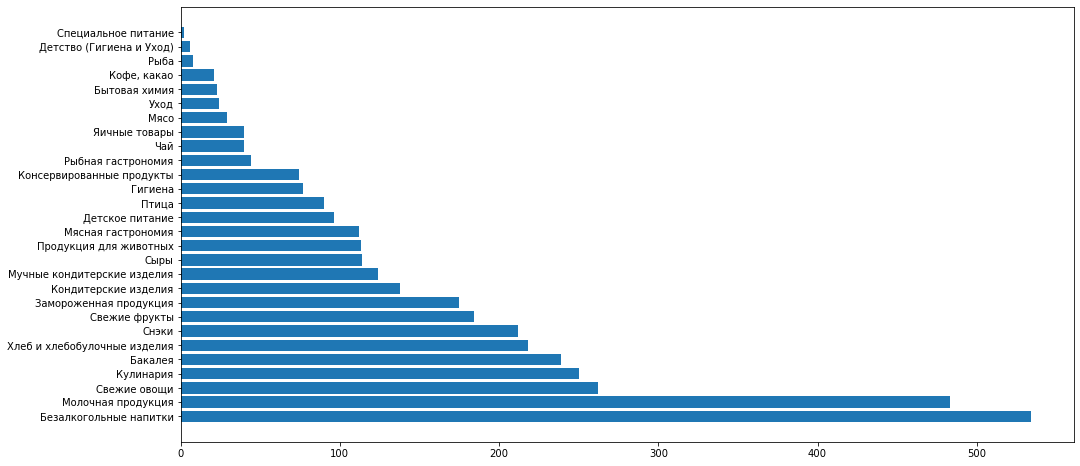

In [15]:
plt.barh(most_popular_cat['level1'], most_popular_cat['quantity'])

In [16]:
#allocation product on subcategories level1 and level2
sales_on_level1_level2 = df.groupby(['level1', 'level2']).agg({'quantity':'sum'}).reset_index()
sales_on_level1_level2

,level1,level2,quantity
0,Бакалея,Все для суши,9
1,Бакалея,Зерновые для завтраков,24
2,Бакалея,Ингредиенты для готовки,21
3,Бакалея,"Крупы, бобовые",30
4,Бакалея,Макаронные изделия,24
...,...,...,...
95,Хлеб и хлебобулочные изделия,Хлеб и хлебобулочные изделия,218
96,Чай,Зеленый чай,7
97,Чай,Чайные напитки,7
98,Чай,Черный чай,26


In [17]:
#finding average spendings on 13.01.2022
df['date'] = pd.to_datetime(df['accepted_at']).dt.date
df.head(3)

,order_id,accepted_at,product_id,quantity,regular_price,price,cost_price,level1,level2,name,date
0,1517514900,2022-01-13 16:48:19,17122,1,169,169,74,Рыбная гастрономия,Нерыбные продукты моря,Крабовые палочки Меридиан,2022-01-13
1,1517430051,2022-01-13 16:46:53,17122,1,169,169,74,Рыбная гастрономия,Нерыбные продукты моря,Крабовые палочки Меридиан,2022-01-13
2,1517578174,2022-01-13 18:12:30,17122,1,169,169,74,Рыбная гастрономия,Нерыбные продукты моря,Крабовые палочки Меридиан,2022-01-13


In [18]:
df.astype({'date': 'datetime64'}).dtypes

order_id                  int64
accepted_at      datetime64[ns]
product_id                int64
quantity                  int64
regular_price             int64
price                     int64
cost_price                int64
level1                   object
level2                   object
name                     object
date             datetime64[ns]
dtype: object

In [19]:
df = df.assign(total=lambda x: (x['price'] * x['quantity']))
#df[pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d') == '2022-01-13']

In [21]:
df['total'].sum()/df['order_id'].nunique()

915.6378676470588

In [22]:
#average bill for '2022-01-13'
df[pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d') == '2022-01-13'].groupby('order_id').agg({'total':'sum'}).mean()

total    915.637868
dtype: float64

In [23]:
#finding promo share of products in cheese category
df.loc[((df['level1'] == 'Сыры') &(df['price'] != df['regular_price']))]['quantity'].sum()/df[df['level1'] == 'Сыры']['quantity'].sum()

0.30701754385964913

In [24]:
#making piechart
data = [['promo_share', df.loc[((df['level1'] == 'Сыры') &(df['price'] != df['regular_price']))]['quantity'].sum()], ['regular', df[df['level1'] == 'Сыры']['quantity'].sum()]]
new_df = pd.DataFrame(data, columns=['rev_types', 'value'])

In [25]:
new_df

,rev_types,value
0,promo_share,35
1,regular,114


([<matplotlib.patches.Wedge at 0x7faf02294a60>,
 [Text(0.8138283050794426, 0.7400564099117863, 'promo_share'),
  Text(-0.8138283397239826, -0.7400563718137328, 'regular')])

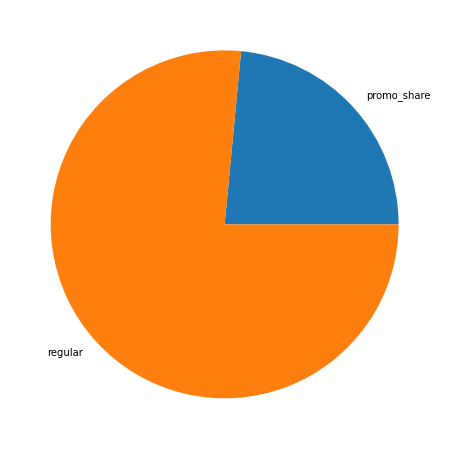

In [27]:
plt.pie(new_df['value'], labels=new_df['rev_types'])

In [29]:
#calculating margin profit
pd.set_option('display.max_columns', 40)

In [30]:
df = df.assign(margin=lambda x: ((x['regular_price'] - x['cost_price'])*x['quantity']))
df.head(5)

,order_id,accepted_at,product_id,quantity,regular_price,price,cost_price,level1,level2,name,date,total,margin
0,1517514900,2022-01-13 16:48:19,17122,1,169,169,74,Рыбная гастрономия,Нерыбные продукты моря,Крабовые палочки Меридиан,2022-01-13,169,95
1,1517430051,2022-01-13 16:46:53,17122,1,169,169,74,Рыбная гастрономия,Нерыбные продукты моря,Крабовые палочки Меридиан,2022-01-13,169,95
2,1517578174,2022-01-13 18:12:30,17122,1,169,169,74,Рыбная гастрономия,Нерыбные продукты моря,Крабовые палочки Меридиан,2022-01-13,169,95
3,1517466327,2022-01-13 15:11:12,22199,1,219,219,130,Сыры,Мягкие сыры,Сыр Самокат,2022-01-13,219,89
4,1517429157,2022-01-13 19:15:59,22199,1,219,219,130,Сыры,Мягкие сыры,Сыр Самокат,2022-01-13,219,89


In [31]:
margin_df = df.groupby('level1').agg({'margin':'sum'}).reset_index().sort_values(by = 'margin', ascending = False)

<BarContainer object of 28 artists>

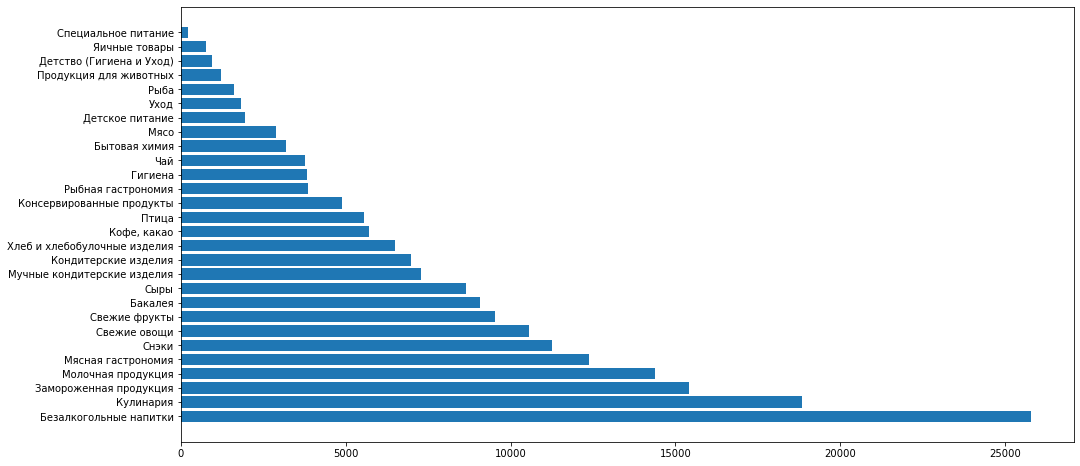

In [32]:
plt.barh(margin_df['level1'], margin_df['margin'])

In [33]:
#conducting sales and quantity ABC analysis

In [34]:
df.head(5)

,order_id,accepted_at,product_id,quantity,regular_price,price,cost_price,level1,level2,name,date,total,margin
0,1517514900,2022-01-13 16:48:19,17122,1,169,169,74,Рыбная гастрономия,Нерыбные продукты моря,Крабовые палочки Меридиан,2022-01-13,169,95
1,1517430051,2022-01-13 16:46:53,17122,1,169,169,74,Рыбная гастрономия,Нерыбные продукты моря,Крабовые палочки Меридиан,2022-01-13,169,95
2,1517578174,2022-01-13 18:12:30,17122,1,169,169,74,Рыбная гастрономия,Нерыбные продукты моря,Крабовые палочки Меридиан,2022-01-13,169,95
3,1517466327,2022-01-13 15:11:12,22199,1,219,219,130,Сыры,Мягкие сыры,Сыр Самокат,2022-01-13,219,89
4,1517429157,2022-01-13 19:15:59,22199,1,219,219,130,Сыры,Мягкие сыры,Сыр Самокат,2022-01-13,219,89


In [35]:
#creating dataframe with abc analysis on quantity
abc_q = df.groupby('name').agg({'quantity':'sum'}).sort_values(by = 'quantity', ascending = False).reset_index()
abc_q.head(10)

,name,quantity
0,Чипсы Lay's,73
1,Напиток Coca-Cola,65
2,Вода Шишкин лес,62
3,Молоко Простоквашино,55
4,Бананы,53
5,Сырок творожный Самокат,49
6,Батон нарезной Коломенское,46
7,Вода Сенежская,44
8,Молоко Самокат,34
9,Филе грудки ЦБ Петелинка,33


In [36]:
#making abc function

def ABC(perc):
    if perc > 0 and perc < 0.8:
        return 'A'
    elif perc >=0.8 and perc < 0.95:
        return 'B'
    elif perc >=0.95:
        return 'C'

In [37]:
abc_q['total'] = abc_q['quantity'].sum()
abc_q
abc_q['share'] = abc_q['quantity']/abc_q['total']
abc_q['cummsum'] = abc_q['quantity'].cumsum()
abc_q['running_share'] = abc_q['cummsum']/abc_q['total']
abc_q

,name,quantity,total,share,cummsum,running_share
0,Чипсы Lay's,73,3722,0.019613,73,0.019613
1,Напиток Coca-Cola,65,3722,0.017464,138,0.037077
2,Вода Шишкин лес,62,3722,0.016658,200,0.053735
3,Молоко Простоквашино,55,3722,0.014777,255,0.068512
4,Бананы,53,3722,0.014240,308,0.082751
...,...,...,...,...,...,...
886,Средство Unicum,1,3722,0.000269,3718,0.998925
887,Средство Domestos,1,3722,0.000269,3719,0.999194
888,Говядина Самокат,1,3722,0.000269,3720,0.999463
889,Соус соевый Yamasa,1,3722,0.000269,3721,0.999731


In [38]:
abc_q['abc_q'] = abc_q['running_share'].apply(ABC)
abc_q

,name,quantity,total,share,cummsum,running_share,abc_q
0,Чипсы Lay's,73,3722,0.019613,73,0.019613,A
1,Напиток Coca-Cola,65,3722,0.017464,138,0.037077,A
2,Вода Шишкин лес,62,3722,0.016658,200,0.053735,A
3,Молоко Простоквашино,55,3722,0.014777,255,0.068512,A
4,Бананы,53,3722,0.014240,308,0.082751,A
...,...,...,...,...,...,...,...
886,Средство Unicum,1,3722,0.000269,3718,0.998925,C
887,Средство Domestos,1,3722,0.000269,3719,0.999194,C
888,Говядина Самокат,1,3722,0.000269,3720,0.999463,C
889,Соус соевый Yamasa,1,3722,0.000269,3721,0.999731,C


In [39]:
#creating dataframe with abc analysis on sales
abc_sales = df.groupby('name').agg({'total':'sum'}).sort_values(by = 'total', ascending = False).reset_index()
abc_sales['total_all'] = abc_sales['total'].sum()
abc_sales['share'] = abc_sales['total']/abc_sales['total_all']
abc_sales['cummsum'] = abc_sales['total'].cumsum()
abc_sales['running_share'] = abc_sales['cummsum']/abc_sales['total_all']
abc_sales['abc_s'] = abc_sales['running_share'].apply(ABC)
abc_sales

,name,total,total_all,share,cummsum,running_share,abc_s
0,Филе грудки ЦБ Петелинка,9807,445497,0.022014,9807,0.022014,A
1,Чипсы Lay's,8523,445497,0.019131,18330,0.041145,A
2,Напиток Coca-Cola,6125,445497,0.013749,24455,0.054894,A
3,Бананы,5046,445497,0.011327,29501,0.066220,A
4,Мандарины,5046,445497,0.011327,34547,0.077547,A
...,...,...,...,...,...,...,...
886,Сок Агуша,32,445497,0.000072,445388,0.999755,C
887,Жевательная резинка Chupa Chups,29,445497,0.000065,445417,0.999820,C
888,Конфеты Super Step,29,445497,0.000065,445446,0.999886,C
889,Творог Тёма,26,445497,0.000058,445472,0.999944,C


In [40]:
final_df_abc = pd.merge(abc_sales, abc_q, on = 'name')
final_df_abc = final_df_abc[['name', 'abc_s', 'abc_q']]
final_df_abc

,name,abc_s,abc_q
0,Филе грудки ЦБ Петелинка,A,A
1,Чипсы Lay's,A,A
2,Напиток Coca-Cola,A,A
3,Бананы,A,A
4,Мандарины,A,A
...,...,...,...
886,Сок Агуша,C,C
887,Жевательная резинка Chupa Chups,C,B
888,Конфеты Super Step,C,B
889,Творог Тёма,C,B


In [41]:
final_df_abc['abc_rank'] = final_df_abc[['abc_s', 'abc_q']].apply(" ".join, axis=1)
final_df_abc

,name,abc_s,abc_q,abc_rank
0,Филе грудки ЦБ Петелинка,A,A,A A
1,Чипсы Lay's,A,A,A A
2,Напиток Coca-Cola,A,A,A A
3,Бананы,A,A,A A
4,Мандарины,A,A,A A
...,...,...,...,...
886,Сок Агуша,C,C,C C
887,Жевательная резинка Chupa Chups,C,B,C B
888,Конфеты Super Step,C,B,C B
889,Творог Тёма,C,B,C B
